# Analise dos dados

Vamos iniciar carregando os dados do dataset preparado no notebook de `DataPreparation.ipynb`

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_dataset = pd.read_csv( './dataset-canditatos-receita-e-votos.csv', encoding='latin1', sep=';')

df_governador = df_dataset[df_dataset['DS_CARGO'] == 'GOVERNADOR']
df_governador = df_governador[df_governador['NR_TURNO'] == 1]
labels = df_governador['TOTAL_RECEITA']

labels.head()

Agora vamos gerar um grafico para analisar o gastos x numeros de votos para os governadores do rio grande do sul. 

c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Glyph 131 (\x83) missing from current font.
  app.launch_new_instance()
c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


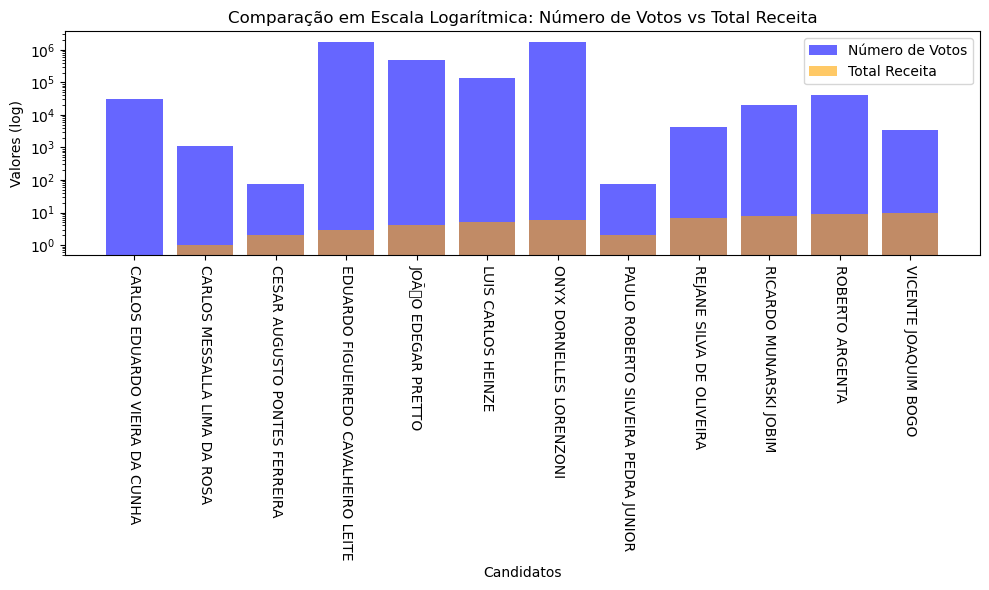

In [56]:
df_governador = df_dataset[df_dataset['DS_CARGO'] == 'GOVERNADOR']
df_governador = df_governador[df_governador['NR_TURNO'] == 1]

plt.figure(figsize=(10, 6))

# Gráficos com escala logarítmica
plt.bar(df_governador['NM_CANDIDATO'], df_governador['QT_VOTOS'], color='blue', alpha=0.6, label='Número de Votos')
plt.bar(df_governador['NM_CANDIDATO'], df_governador['TOTAL_RECEITA'], color='orange', alpha=0.6, label='Total Receita')

# Ajustar escala logarítmica
plt.yscale('log')
plt.xlabel('Candidatos')
plt.ylabel('Valores (log)')
plt.title('Comparação em Escala Logarítmica: Número de Votos vs Total Receita')
plt.xticks(rotation=270)
plt.legend()
plt.tight_layout()
plt.show()

Agora vamos dar uma olhada nos graficos individuais de quantidade de votos e o total de receita.

c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Glyph 131 (\x83) missing from current font.
c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


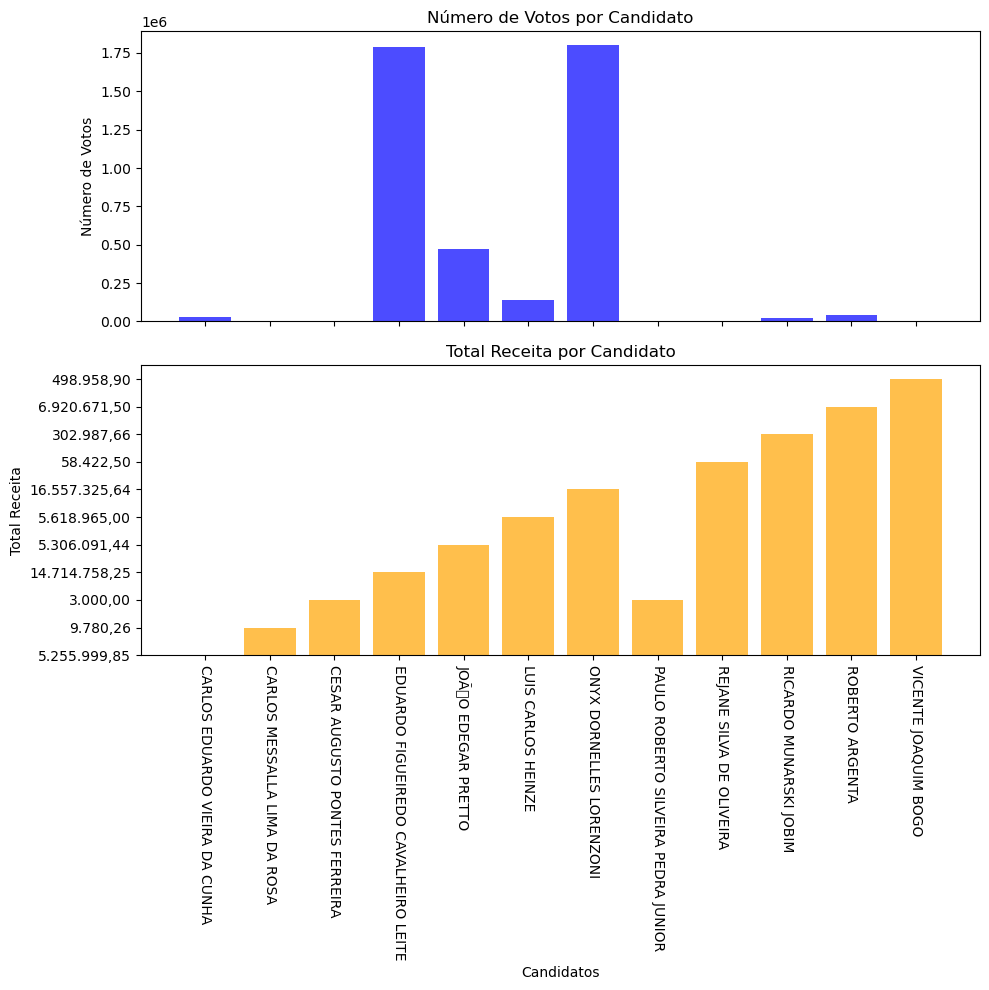

In [55]:
# Configurar os dados
labels = df_governador['NM_CANDIDATO']
qt_votos = df_governador['QT_VOTOS']
total_receita = df_governador['TOTAL_RECEITA']

# Criar a figura
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Gráfico de Número de Votos
axs[0].bar(labels, qt_votos, color='blue', alpha=0.7)
axs[0].set_title('Número de Votos por Candidato')
axs[0].set_ylabel('Número de Votos')
axs[0].tick_params(axis='x', rotation=270)

# Gráfico de Total Receita
axs[1].bar(labels, total_receita, color='orange', alpha=0.7)
axs[1].set_title('Total Receita por Candidato')
axs[1].set_ylabel('Total Receita')
axs[1].tick_params(axis='x', rotation=270)

# Ajustar o layout
plt.xlabel('Candidatos')
plt.tight_layout()
plt.show()

Agora vamos realizar os mesmos graficos para os candidatos 10 mais votados Deputados Federais.

c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Glyph 129 (\x81) missing from current font.
c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


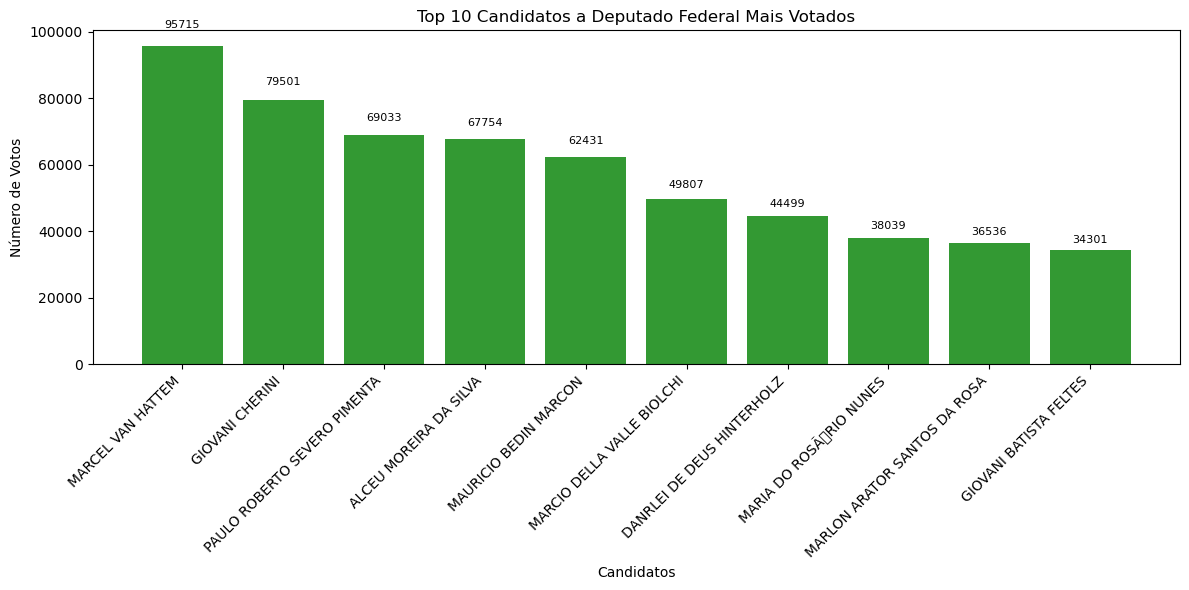

In [47]:
# Filtrar apenas candidatos a deputado federal
df_deputado_federal = df_dataset[df_dataset['DS_CARGO'] == 'DEPUTADO FEDERAL']

# Ordenar pelo número de votos e selecionar os 10 mais votados
top_10_deputados = df_deputado_federal.sort_values(by='QT_VOTOS', ascending=False).head(10)

# Configurar os dados para o gráfico
labels = top_10_deputados['NM_CANDIDATO']
qt_votos = top_10_deputados['QT_VOTOS']

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, qt_votos, color='green', alpha=0.8)

# Adicionar rótulos de valor em cima das barras
for bar, votos in zip(bars, qt_votos):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 * bar.get_height(),
             f'{int(votos)}', ha='center', va='bottom', fontsize=8)

# Configurações do gráfico
plt.title('Top 10 Candidatos a Deputado Federal Mais Votados')
plt.xlabel('Candidatos')
plt.ylabel('Número de Votos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Agora vamos fazer o comparativo de receita vs votos

c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Glyph 129 (\x81) missing from current font.
  
c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


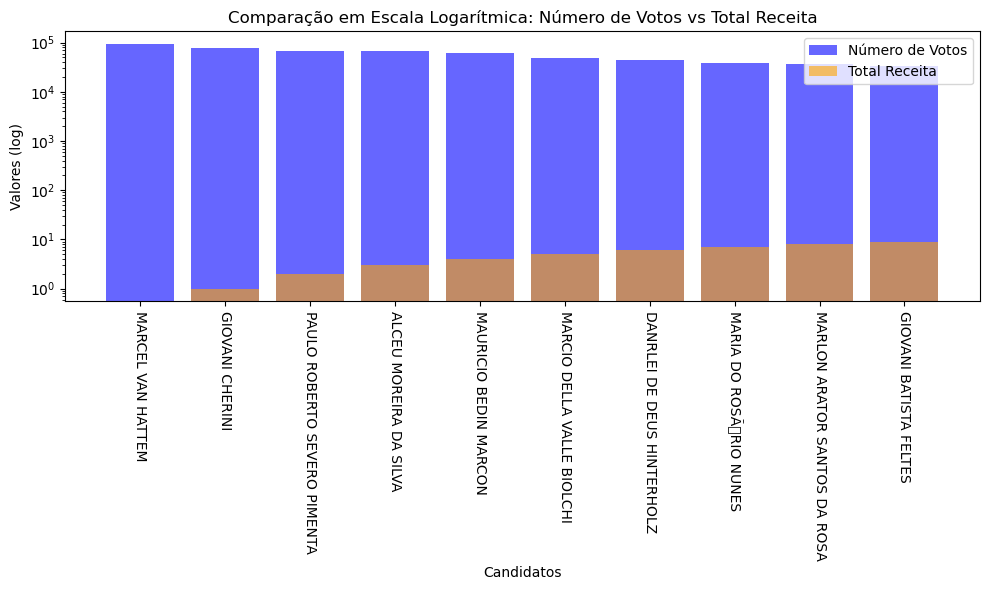

In [54]:
plt.figure(figsize=(10, 6))

# Gráficos com escala logarítmica
plt.bar(top_10_deputados['NM_CANDIDATO'], top_10_deputados['QT_VOTOS'], color='blue', alpha=0.6, label='Número de Votos')
plt.bar(top_10_deputados['NM_CANDIDATO'], top_10_deputados['TOTAL_RECEITA'], color='orange', alpha=0.6, label='Total Receita')

# Ajustar escala logarítmica
plt.yscale('log')
plt.xlabel('Candidatos')
plt.ylabel('Valores (log)')
plt.title('Comparação em Escala Logarítmica: Número de Votos vs Total Receita')
plt.xticks(rotation=270)
plt.legend()
plt.tight_layout()
plt.show()

Agora vamos fazer fazer os graficos dos 10 deputados estaduais mais votados. 

c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Glyph 137 (\x89) missing from current font.
c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


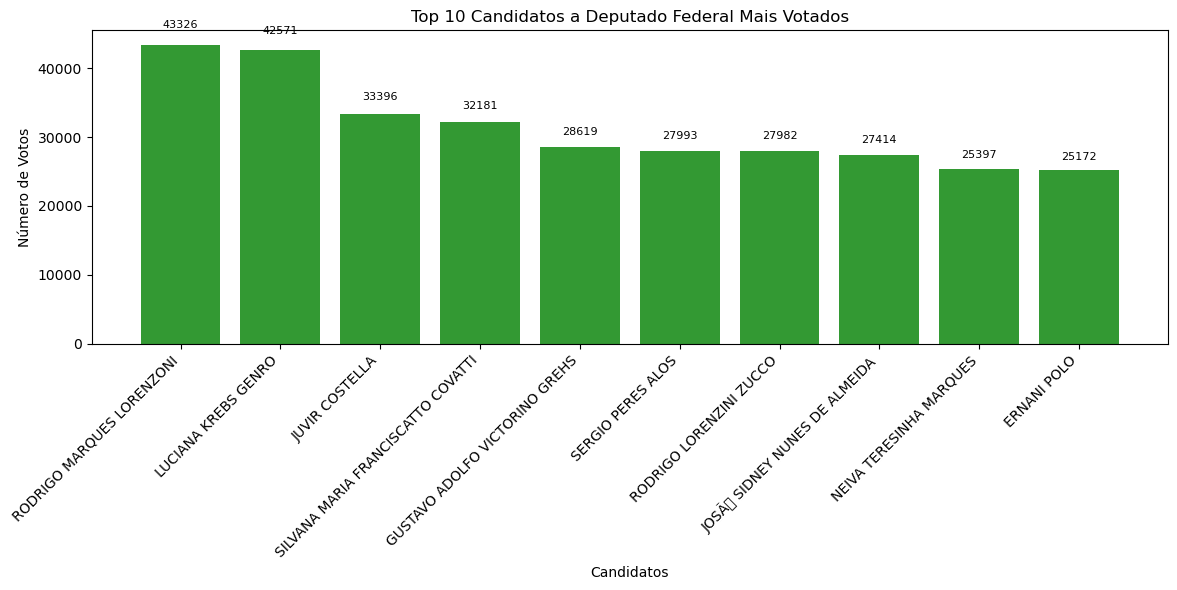

In [58]:
# Filtrar apenas candidatos a deputado federal
df_estadual = df_dataset[df_dataset['DS_CARGO'] == 'DEPUTADO ESTADUAL']

# Ordenar pelo número de votos e selecionar os 10 mais votados
top_10_deputados = df_estadual.sort_values(by='QT_VOTOS', ascending=False).head(10)

# Configurar os dados para o gráfico
labels = top_10_deputados['NM_CANDIDATO']
qt_votos = top_10_deputados['QT_VOTOS']

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, qt_votos, color='green', alpha=0.8)

# Adicionar rótulos de valor em cima das barras
for bar, votos in zip(bars, qt_votos):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 * bar.get_height(),
             f'{int(votos)}', ha='center', va='bottom', fontsize=8)

# Configurações do gráfico
plt.title('Top 10 Candidatos a Deputado Federal Mais Votados')
plt.xlabel('Candidatos')
plt.ylabel('Número de Votos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Por último vamos verificar a quatidade de votos vs o total de receita

c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Glyph 137 (\x89) missing from current font.
  
c:\Users\e_tom\anaconda3\envs\t3Coleta\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


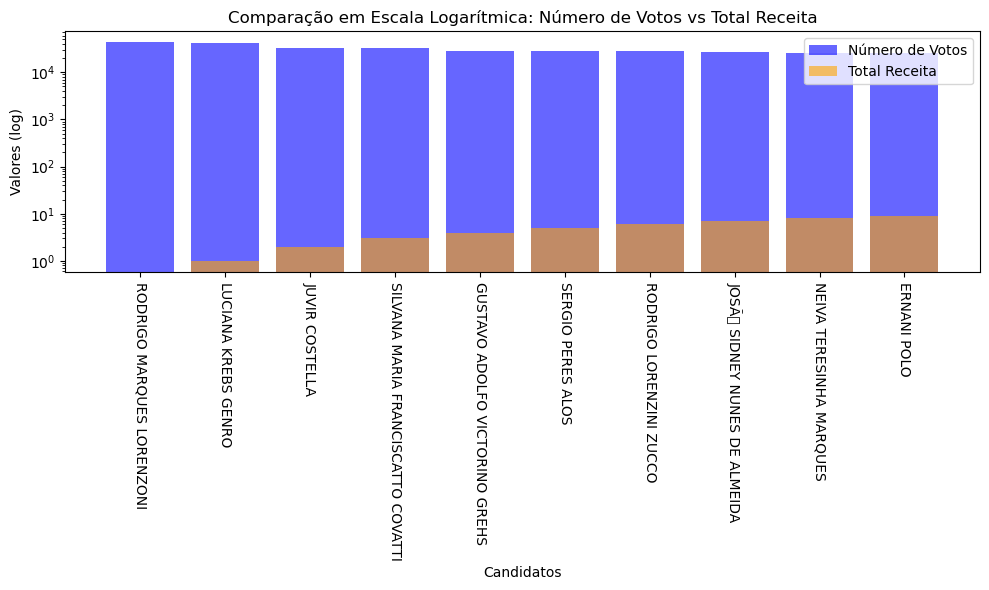

In [59]:
plt.figure(figsize=(10, 6))

# Gráficos com escala logarítmica
plt.bar(top_10_deputados['NM_CANDIDATO'], top_10_deputados['QT_VOTOS'], color='blue', alpha=0.6, label='Número de Votos')
plt.bar(top_10_deputados['NM_CANDIDATO'], top_10_deputados['TOTAL_RECEITA'], color='orange', alpha=0.6, label='Total Receita')

# Ajustar escala logarítmica
plt.yscale('log')
plt.xlabel('Candidatos')
plt.ylabel('Valores (log)')
plt.title('Comparação em Escala Logarítmica: Número de Votos vs Total Receita')
plt.xticks(rotation=270)
plt.legend()
plt.tight_layout()
plt.show()